# Load pre-trained word vectors, store them in a vector index and lookup similar words. Visualize similar words too.

We will download pre-trained word vectors from https://fasttext.cc/docs/en/english-vectors.html


In [ ]:
# wget is a terminal command to download a file. 
# You can run terminal commands in Python notebook by prefixing with a "!

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

In [ ]:
!unzip /kaggle/working/wiki-news-300d-1M.vec.zip

In [ ]:
# head is a terminal command to show you a few lines of the file.
!head /kaggle/input/wiki-16b/wiki-news-300d-1M-subword.vec

In [24]:
# Importing the necessary module to work with files
import os

# Defining the path to the file we want to read
file_path = '/kaggle/input/wiki-16b/wiki-news-300d-1M-subword.vec'

# Using a 'try-except' block to handle any errors that may occur while opening the file
try:
    # Opening the file in read mode ('r')
    # The 'with' statement ensures the file is properly closed after its containing code block
    # finishes. 'with' is an example of a context manager.
    with open(file_path, 'r', encoding='utf-8') as file:
        # Reading the first line of the file which contains 
        # metadata (like number of words and dimensions)
        first_line = file.readline()
        
        # Printing the first line to understand the metadata information
        print("First line (metadata):", first_line)
        
        # Initializing an empty list to store the word vectors
        word_vectors = dict()
        
        # Looping through each subsequent line in the file
        for line in file:
            # Splitting the line into word and vector components using whitespace as delimiter
            # split() can use a custom delimiter but if you don't specify one, it defaults to space.
            parts = line.strip().split()
            
            # Extracting the word from the first part of the line
            word = parts[0]
            
            # Extracting the vector values from the remaining parts and converting them to floats
            # The firt item is the word and the rest of the items are the values of the vector embedding.
            # parts[1:] is a list from the second item to the last item (list index start at 0 for the first item)
            # float is being applied to each item in the list. This is being done using map.
            # map takes a function and a list and applies that function to each item in the input list.
            # list just converts the result back to a list type.
            embedding_vector = list(map(float, parts[1:]))
        
            # Appending a tuple of word and its corresponding vector to the word_vectors list
            word_vectors[word] = embedding_vector

    # Printing a message to indicate that the file has been read successfully
    print("File read successfully and word vectors stored in the dictionary.")
    # Optionally, you can print a few word vectors to see what they look like
    for word, vector in list(word_vectors.items())[:5]:  # Displaying only the first 5 for brevity
        print(f"Word: ({word}), Vector: {vector}")

except Exception as e:
    # Printing any error that occurs during the file reading process
    print(f"An error occurred: {e}")

First line (metadata): 999994 300

File read successfully and word vectors stored in the dictionary.
Word: (,), Vector: [0.0203, -0.0123, -0.0076, 0.0187, 0.0173, -0.0052, 0.0147, 0.1364, -0.0435, 0.0033, -0.0255, -0.0311, 0.0307, -0.0088, -0.0108, -0.0031, -0.0014, 0.0138, -0.0206, 0.0074, 0.021, -0.0138, 0.0859, 0.0425, 0.0037, 0.0394, 0.0277, 0.0174, -0.0232, 0.0083, -0.0142, -0.0278, 0.0041, 0.0807, 0.1149, 0.078, -0.0944, 0.0052, -0.0048, -0.0167, -0.0362, -0.0601, 0.0082, 0.0264, -0.0053, 0.026, -0.0027, -0.0403, 0.042, 0.0304, -0.0542, -0.0202, 0.0349, 0.01, 0.0917, 0.0487, 0.0669, -0.0182, 0.0035, -0.0418, 0.016, -0.0236, -0.3184, 0.0234, 0.0766, -0.0002, 0.0158, -0.0145, -0.0328, -0.0241, -0.0579, 0.02, 0.0239, -0.0174, -0.0147, -0.0235, 0.0525, 0.2441, 0.0051, -0.0001, -0.0161, -0.147, -0.1094, -0.0444, -0.0, 0.0002, -0.0118, -0.1224, -0.0018, 0.0077, 0.0124, 0.1155, 0.0983, -0.0906, 0.0561, 0.0198, -0.0336, -0.0192, 0.027, 0.0193, -0.0627, 0.0113, -0.0063, 0.0193, 0.0026, 0.

In [29]:
# word vector of some words like college, university
print(list(word_vectors['college']))

[-0.0239, -0.0216, 0.0124, -0.0064, 0.0161, -0.0316, -0.0054, -0.0386, 0.0295, 0.0072, -0.0162, -0.0348, -0.0004, 0.0275, -0.0188, 0.0101, 0.0531, 0.006, 0.0162, 0.0145, 0.0095, 0.0281, -0.0118, 0.0326, -0.0033, -0.0036, -0.0031, -0.0004, -0.0123, 0.0113, 0.0067, 0.0017, 0.0015, -0.0142, -0.0006, 0.0278, 0.0088, 0.0274, -0.0206, 0.0136, 0.0067, -0.0534, 0.0129, 0.0149, 0.0101, -0.0007, -0.0052, -0.0167, -0.0094, 0.0231, 0.0144, 0.0032, 0.0149, 0.0142, -0.0225, 0.0053, -0.031, 0.0211, 0.0006, 0.0023, 0.0211, 0.0157, 0.0462, 0.0338, 0.018, -0.0417, -0.0032, -0.0128, 0.0093, 0.0001, 0.0024, -0.01, 0.0126, 0.0035, 0.0066, -0.0019, -0.0096, 0.0044, 0.0096, 0.0004, -0.0026, 0.0101, -0.0079, -0.0069, -0.0413, 0.0154, -0.0292, -0.0211, -0.023, -0.0122, 0.0036, 0.0152, -0.0376, 0.0017, 0.0145, 0.0362, -0.0038, 0.0133, 0.0179, 0.0196, 0.052, 0.0164, 0.0087, -0.0033, 0.0179, -0.0299, -0.0165, 0.0062, -0.0005, 0.0234, -0.0089, 0.0275, 0.0151, 0.0144, 0.0134, 0.0118, -0.0024, 0.0119, -0.0015, 0.000

In [6]:
# Estimate cosine similarity between a few words
import numpy as np
from numpy.linalg import norm
 
# define two lists or array
w1 = np.array(word_vectors['college'])
w2 = np.array(word_vectors['university'])
w3 = np.array(word_vectors['office'])
 
 
# compute cosine similarity
w1_w2_cosine = np.dot(w1,w2)/(norm(w1)*norm(w2))
print("Cosine Similarity between college and university:", w1_w2_cosine)

# compute cosine similarity
w1_w3_cosine = np.dot(w1,w3)/(norm(w1)*norm(w3))
print("Cosine Similarity between college and office:", w1_w3_cosine)

Cosine Similarity between college and university: 0.8345269813053264
Cosine Similarity between college and office: 0.5355124734928376


In [7]:
# find the top 10 similar words to the word "college"

# First store the cosine similarity between the vector for the word "college" to 
# all the other vectors.
similarity_vals = dict()
query_vec = word_vectors['college']

for word, vector in word_vectors.items():
   similarity_vals[word] =  np.dot(query_vec, vector)/(norm(query_vec)*norm(vector))
    
    

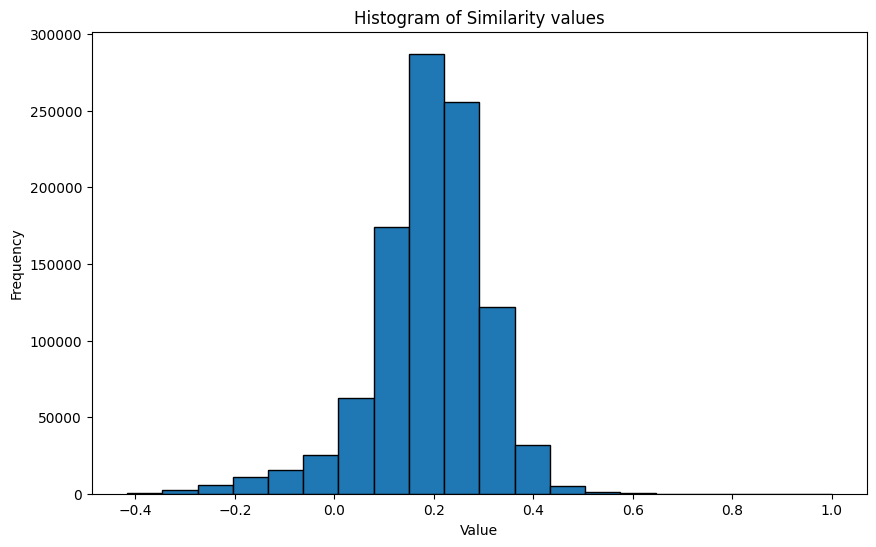

In [8]:
# Lets plot the distances of all the other words against the word "college"
import matplotlib.pyplot as plt

# Extract values from the dictionary
values = list(similarity_vals.values())

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, edgecolor='black')

# Adding title and labels
plt.title('Histogram of Similarity values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [9]:
# sort the values to get the top 10
# Read https://docs.python.org/3/howto/sorting.html
top_10_similar_words = sorted(similarity_vals.items(), key=lambda item: item[1], reverse=True)[:10]

# Print the top 10 similar words and their similarity scores
for word, similarity in top_10_similar_words:
    print(f"Word: {word}, Similarity: {similarity}")

Word: college, Similarity: 1.0000000000000002
Word: university, Similarity: 0.8345269813053264
Word: school, Similarity: 0.7881687621880291
Word: community-college, Similarity: 0.7745571723072515
Word: pre-college, Similarity: 0.7742475204752732
Word: non-college, Similarity: 0.7697518561364625
Word: bi-college, Similarity: 0.7630790742307785
Word: university-college, Similarity: 0.7609389534593991
Word: junior-college, Similarity: 0.7574714084022116
Word: intercollege, Similarity: 0.7567182542921636


# Lets build visualizations between a word and its similar words

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from numpy.linalg import norm

# Function to calculate the top k similar words
def find_top_similar_words(query_word, word_vectors, top_k = 50):
    similarity_vals = dict()
    query_vec = word_vectors[query_word]
    
    # Calculate cosine similarity between query word and all other words
    for word, vector in word_vectors.items():
        similarity_vals[word] = np.dot(query_vec, vector) / (norm(query_vec) * norm(vector))
    
    # Sort words by similarity value and get the top_k words
    # This part of the function can be stored outside so that you can chooes to extract
    # as many top_k words as you desire.
    sorted_words = sorted(similarity_vals.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[1:(top_k+1)]  # Exclude the query word itself

In [11]:
# As you can see finding similar words via the brute force approach is slow.
query_word = "boat"
similar_words_boat = find_top_similar_words(query_word, word_vectors, 500)

In [12]:
# Constract an array of the query_word and its similar words.

word = query_word

# Initialize an empty array to hold word vectors
# 300 is the size of the embedding vectors we are working with
arrays = np.empty((0, 300), dtype='f')
    
# Lists to hold the words and their colors for the plot
word_labels = [word]
color_list = ['red']  # Query word will be red
    
# Add the vector for the query word
arrays = np.append(arrays, [word_vectors[word]], axis=0)
    
# Add vectors for the most similar words to the array
for wrd in similar_words_boat[:100]:
    wrd_vector = word_vectors[wrd[0]]
    word_labels.append(wrd[0])
    color_list.append('blue')  # Similar words will be blue
    arrays = np.append(arrays, [wrd_vector], axis=0)

In [13]:
arrays.shape

(101, 300)

In [14]:
# Reduce the dimensionality of word vectors from 300 to 50 dimensions using PCA
reduc = PCA(n_components=50).fit_transform(arrays)

In [15]:
# Use t-SNE to reduce the dimensionality further to 2 dimensions for visualization
np.set_printoptions(suppress=True)  # Suppress scientific notation for clarity
#Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
Y = TSNE(n_components=2, random_state=0, perplexity=5, learning_rate=200).fit_transform(reduc)

# Prepare data for plotting
df = pd.DataFrame({
        'x': [x for x in Y[:, 0]],
        'y': [y for y in Y[:, 1]],
        'words': word_labels,
        'color': color_list
})

In [16]:
df_sample = df.head(10)

In [17]:
df_sample

,x,y,words,color
0,-140.147308,-182.227615,boat,red
1,-126.575455,-168.516708,boats,blue
2,100.883392,-78.316139,boat-,blue
3,69.431747,155.736694,rowboat,blue
4,21.879887,-19.130848,motorboat,blue
5,-163.347229,-118.398018,sailboat,blue
6,116.139015,-82.738083,boat.,blue
7,-1651.593994,727.514465,catboat,blue
8,30.553057,123.720993,paddleboat,blue
9,54.647041,206.841629,towboat,blue


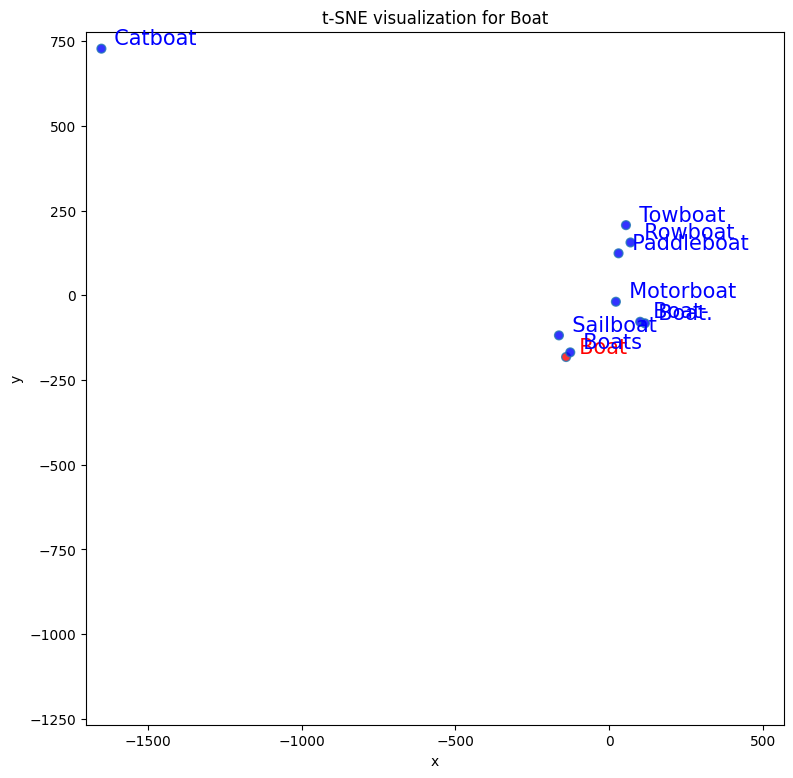

In [18]:
# Set up the plot
fig, _ = plt.subplots()
fig.set_size_inches(9, 9)
    
# Create the scatter plot
p1 = sns.regplot(data=df_sample,
                 x="x",
                 y="y",
                 fit_reg=False,  # Don't fit a regression line
                 marker="o",
                 scatter_kws={'s': 40, 'facecolors': df_sample['color']})

# Add labels to each point in the plot
for line in range(0, df_sample.shape[0]):
    p1.text(df_sample["x"][line],
            df_sample['y'][line],
            '  ' + df["words"][line].title(),
            horizontalalignment='left',
            verticalalignment='bottom', 
            size='medium',
            color=df_sample['color'][line],
            weight='normal').set_size(15)

# Set the limits for x and y axes
plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

# Add a title to the plot
plt.title('t-SNE visualization for {}'.format(word.title()))

# Show the plot
plt.show()

# Using Annoy to create a vector index to enable fast vector search

In [19]:
!pip install annoy

In [20]:
# https://github.com/spotify/annoy
    
    
from annoy import AnnoyIndex

f = 300  # Length of vector that will be indexed
t = AnnoyIndex(f, 'angular')

# Annoy stores each vector against a integer key
# we create index_to_word to store the index values against the word
index_to_word = dict()

# Initialize the index_val to 0
index_val = 0

# Iterate through our word_vectors dict that contains each word as the dictionary key
# and the fasttext embedding vector as the dictionary value
for word, vector in word_vectors.items():    
    t.add_item(index_val, vector)
    index_to_word[index_val] = word
    index_val = index_val + 1

t.build(50) # 50 trees
t.save('word_embeddings.ann')

True

In [21]:
# Read the Annoy index stored earlier
u = AnnoyIndex(f, 'angular')
u.load('/kaggle/working/word_embeddings.ann') # super fast, will just mmap the file


True

In [22]:
query_word = "statistics"
n = 10
v = word_vectors[query_word]
res_inds = u.get_nns_by_vector(v, n, search_k=-1, include_distances=True)
item_indexes, distances = res_inds

In [23]:
print("Words similar to query_word: ", query_word)
print("----------")
for i in range(len(item_indexes)):
    idx = item_indexes[i]
    print("word: ", index_to_word[idx], " is at a distance of: ", distances[i], " or similarity of: ", 1-distances[i])

Words similar to query_word:  statistics
----------
word:  statistics  is at a distance of:  0.0  or similarity of:  1.0
word:  statistics-  is at a distance of:  0.5975067019462585  or similarity of:  0.40249329805374146
word:  statstics  is at a distance of:  0.6946448683738708  or similarity of:  0.30535513162612915
word:  statistcs  is at a distance of:  0.7541600465774536  or similarity of:  0.2458399534225464
word:  t-statistics  is at a distance of:  0.7685405611991882  or similarity of:  0.23145943880081177
word:  F-statistics  is at a distance of:  0.7802385091781616  or similarity of:  0.21976149082183838
word:  data  is at a distance of:  0.7809759378433228  or similarity of:  0.21902406215667725
word:  statics  is at a distance of:  0.7955030798912048  or similarity of:  0.20449692010879517
word:  countings  is at a distance of:  0.8406222462654114  or similarity of:  0.15937775373458862
word:  metrics  is at a distance of:  0.8723275065422058  or similarity of:  0.12767249